## Import packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r'G:\My Drive\4b - Courses\9 - Data Science\Datasets\ALL CSV FILES - 2nd Edition\Wage.csv')
df

,year,age,maritl,race,education,region,jobclass,health,health_ins,logwage,wage
0,2006,18,1. Never Married,1. White,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.318063,75.043154
1,2004,24,1. Never Married,1. White,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,2. No,4.255273,70.476020
2,2003,45,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,1. <=Good,1. Yes,4.875061,130.982177
3,2003,43,2. Married,3. Asian,4. College Grad,2. Middle Atlantic,2. Information,2. >=Very Good,1. Yes,5.041393,154.685293
4,2005,50,4. Divorced,1. White,2. HS Grad,2. Middle Atlantic,2. Information,1. <=Good,1. Yes,4.318063,75.043154
...,...,...,...,...,...,...,...,...,...,...,...
2995,2008,44,2. Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,5.041393,154.685293
2996,2007,30,2. Married,1. White,2. HS Grad,2. Middle Atlantic,1. Industrial,2. >=Very Good,2. No,4.602060,99.689464
2997,2005,27,2. Married,2. Black,1. < HS Grad,2. Middle Atlantic,1. Industrial,1. <=Good,2. No,4.193125,66.229408
2998,2005,27,1. Never Married,1. White,3. Some College,2. Middle Atlantic,1. Industrial,2. >=Very Good,1. Yes,4.477121,87.981033


## Data Preparation

In [4]:
df.rename(columns={"maritl":"marital"}, inplace=True)

In [5]:
for i in ["marital","race","region", "jobclass", "health_ins"]:
    df[f"{i}"] = df[f"{i}"].apply(lambda x: x[3:])

# Education
df["education"] = df["education"].apply(lambda x: x[5:] if x.startswith("1") else x[3:])

# Health
df["health"] = df["health"].apply(lambda x: x[5:])

In [6]:
for i in df.columns[2:9]:
    df[f"{i}"] = df[f"{i}"].astype("category")


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        3000 non-null   int64   
 1   age         3000 non-null   int64   
 2   marital     3000 non-null   category
 3   race        3000 non-null   category
 4   education   3000 non-null   category
 5   region      3000 non-null   category
 6   jobclass    3000 non-null   category
 7   health      3000 non-null   category
 8   health_ins  3000 non-null   category
 9   logwage     3000 non-null   float64 
 10  wage        3000 non-null   float64 
dtypes: category(7), float64(2), int64(2)
memory usage: 115.5 KB


In [8]:
df.describe()

,year,age,logwage,wage
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2005.791000,42.414667,4.653905,111.703608
std,2.026167,11.542406,0.351753,41.728595
min,2003.000000,18.000000,3.000000,20.085537
25%,2004.000000,33.750000,4.447158,85.383940
50%,2006.000000,42.000000,4.653213,104.921507
75%,2008.000000,51.000000,4.857332,128.680488
max,2009.000000,80.000000,5.763128,318.342430


In [9]:
df[df.duplicated() == True]

,year,age,marital,race,education,region,jobclass,health,health_ins,logwage,wage
1530,2004,41,Married,White,HS Grad,Middle Atlantic,Industrial,Very Good,Yes,4.505150,90.481913
1956,2004,38,Married,White,Advanced Degree,Middle Atlantic,Information,Very Good,Yes,5.000000,148.413159
2286,2007,46,Married,White,Advanced Degree,Middle Atlantic,Information,Very Good,Yes,5.641006,281.745971
2718,2006,37,Married,White,HS Grad,Middle Atlantic,Industrial,Very Good,No,4.531479,92.895845
2733,2003,50,Married,White,Advanced Degree,Middle Atlantic,Information,Very Good,Yes,4.903090,134.705375


In [10]:
df.drop_duplicates(inplace=True)

### playing around with regular expressions

In [11]:
df[(df['wage'] == 90.4819133566401) & (df['age'] == 41)]

,year,age,marital,race,education,region,jobclass,health,health_ins,logwage,wage
127,2004,41,Married,White,HS Grad,Middle Atlantic,Industrial,Very Good,Yes,4.50515,90.481913


In [12]:
import re
y = []
for i in range(len(df.wage.values)):
    if match := re.search(r"^(90.481913[\d]+)$",str(df.wage.values[i])):
        y.append(i)
    else:
        continue

y



[15,
 86,
 127,
 259,
 352,
 366,
 420,
 426,
 537,
 556,
 600,
 614,
 805,
 1038,
 1069,
 1306,
 1502,
 1573,
 1731,
 1800,
 1817,
 1917,
 1963,
 2128,
 2397,
 2410,
 2499,
 2547,
 2640,
 2668,
 2695,
 2850,
 2994]

In [13]:
df.columns

Index(['year', 'age', 'marital', 'race', 'education', 'region', 'jobclass',
       'health', 'health_ins', 'logwage', 'wage'],
      dtype='object')

## Data Exploration

#### pandas plot

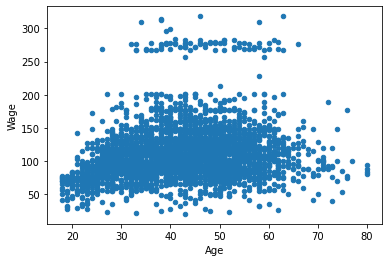

In [14]:
df.plot(x='age', y='wage', kind='scatter', xlabel="Age", ylabel="Wage")
plt.show()

#### matplotlib

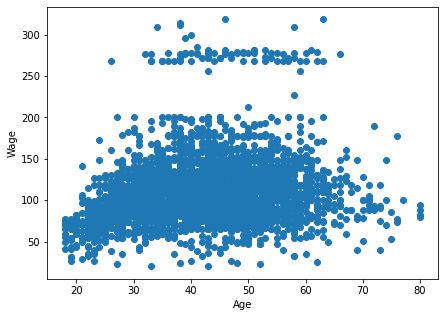

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(data=df, x='age', y='wage')
plt.xlabel("Age"), plt.ylabel("Wage")
plt.show()

polynomial

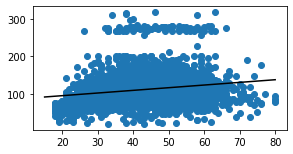

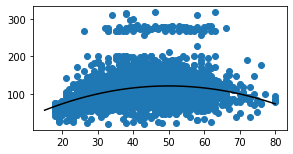

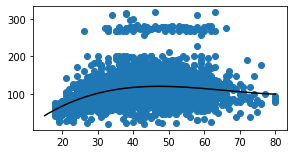

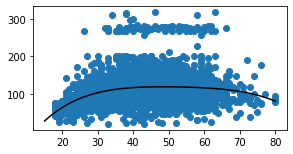

In [16]:
x = df.age.values 
y = df.wage.values
i = 1
while i <= 4:
    model = np.poly1d(np.polyfit(x,y,i))
    u = np.linspace(15,80,200)
    plt.figure(figsize=(10,5))
    plt.subplot(2,2,i)
    plt.plot(x,y, 'o',u,model(u),'k' )
    plt.show()
    i += 1

In [17]:
from scipy import stats

res = stats.pearsonr(df.age.values, df.wage.values)
res.pvalue

3.0083642993889785e-27

In [18]:
df.corr()

,year,age,logwage,wage
year,1.000000,0.038562,0.076356,0.065353
age,0.038562,1.000000,0.217881,0.195738
logwage,0.076356,0.217881,1.000000,0.950733
wage,0.065353,0.195738,0.950733,1.000000


In [19]:
for x in df:
    if pd.api.types.is_numeric_dtype(df[x]):
        r, p = stats.pearsonr(df.wage.values, df[x])
        print(f"{x}: r = {r:.4f}, p = {p:.4f}")

year: r = 0.0654, p = 0.0003
age: r = 0.1957, p = 0.0000
logwage: r = 0.9507, p = 0.0000
wage: r = 1.0000, p = 0.0000


In [20]:
x = 1
print(f"{x:05}")

00001
